## Bankruptcy prediction

#Assumptions: We were already told by the professor that the data is already clean, so not much EDA/cleaning was performed.

In [1]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


# Importing required packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn import ensemble
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Reading data

In [3]:
path = "C:/Users/Karandeep/Downloads/AI in FINANCE/Bankruptcy_data_Final.xlsx"

In [4]:
df = pd.read_excel(path, encoding = "ISO-8859-1")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
Data Year - Fiscal    92872 non-null int64
Tobin's Q             92620 non-null float64
EPS                   92867 non-null float64
Liquidity             92625 non-null float64
Profitability         92625 non-null float64
Productivity          92625 non-null float64
Leverage Ratio        92846 non-null float64
Asset Turnover        92625 non-null float64
Operational Margin    87315 non-null float64
Return on Equity      92864 non-null float64
Market Book Ratio     92815 non-null float64
Assets Growth         86171 non-null float64
Sales Growth          86171 non-null float64
Employee Growth       85862 non-null float64
BK                    92872 non-null int64
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [6]:
#Checking for null data
for col in df.columns:
    print(col + "   " + str(df[col].isna().sum()))

Data Year - Fiscal   0
Tobin's Q   252
EPS   5
Liquidity   247
Profitability   247
Productivity   247
Leverage Ratio   26
Asset Turnover   247
Operational Margin   5557
Return on Equity   8
Market Book Ratio   57
Assets Growth   6701
Sales Growth   6701
Employee Growth   7010
BK   0


In [7]:
#Drop NA for now
df.dropna(inplace = True)

In [8]:
#Verifying that null data is not there now
for col in df.columns:
    print(col + "   " + str(df[col].isna().sum()))

Data Year - Fiscal   0
Tobin's Q   0
EPS   0
Liquidity   0
Profitability   0
Productivity   0
Leverage Ratio   0
Asset Turnover   0
Operational Margin   0
Return on Equity   0
Market Book Ratio   0
Assets Growth   0
Sales Growth   0
Employee Growth   0
BK   0


In [9]:
df.describe()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,81204.000000,81204.000000,81204.000000,81204.000000,81204.000000,81204.000000,81204.000000,81204.000000,81204.000000,81204.000000,8.120400e+04,81204.000000,81204.000000,81204.000000,81204.000000
mean,2004.175952,5.343517,-16.056183,-1.006692,-9.253443,-0.266862,1.505365,1.124603,-7.540954,-2.708753,4.223900e+02,0.967366,2.006705,0.346464,0.005825
std,9.682015,127.527964,2343.250560,98.550174,269.793394,6.993373,270.550286,2.216563,215.120128,348.369194,1.438802e+04,63.939911,182.971661,14.422443,0.076098
min,1980.000000,0.060000,-384000.000000,-25968.520000,-26097.600000,-1241.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-2.306965e+06,-0.999607,-27.431034,-1.000000,0.000000
25%,1998.000000,1.110000,-0.120000,0.030000,-0.390000,-0.020000,0.010000,0.470000,-0.020000,-0.060000,1.246000e+01,-0.044541,-0.036457,-0.047135,0.000000
50%,2006.000000,1.490000,0.480416,0.190000,0.110000,0.060000,0.330000,0.890000,0.060000,0.040000,6.072000e+01,0.054704,0.071337,0.021097,0.000000
75%,2012.000000,2.360000,1.680000,0.389754,0.340000,0.120000,0.860000,1.430000,0.140000,0.070000,2.494200e+02,0.189190,0.217850,0.131409,0.000000
max,2017.000000,25969.270000,55339.000000,1.000000,140.580000,35.920000,75970.380000,276.380000,394.470000,11228.850000,1.020718e+06,14231.000000,39850.000000,2699.000000,1.000000


In [10]:
# No. of unique years in the data is 38
df['Data Year - Fiscal'].nunique()

38

In [11]:
# Make Year as Categorical
df['Data Year - Fiscal'] = df['Data Year - Fiscal'].astype('category')

# Correlations, Outliers, Interaction Effects checks

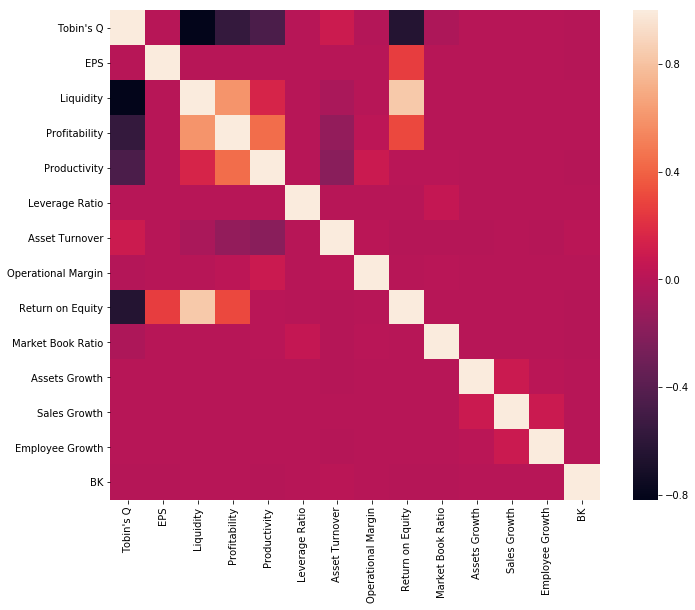

In [12]:
#Checking correlation of features with features and features with output variable - **WITHOUT OUTLIER REMOVAL
# Heatmap analysis - Assume correlation threshold of 0.5
correlation_matrix = df.corr()
a, ab = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=1.0, square=True)
plt.show()

Tobin's Q


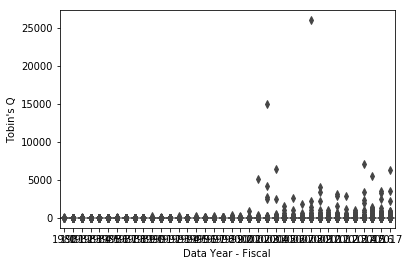

EPS


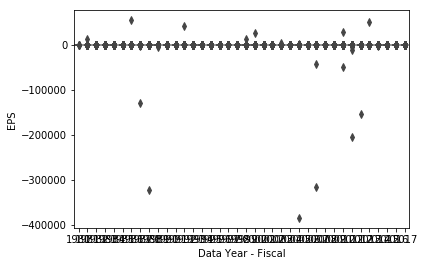

Liquidity


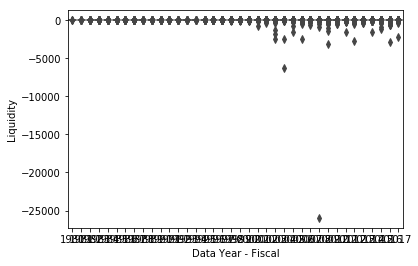

Profitability


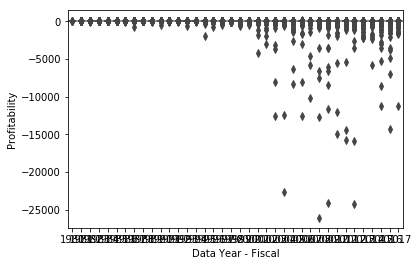

Productivity


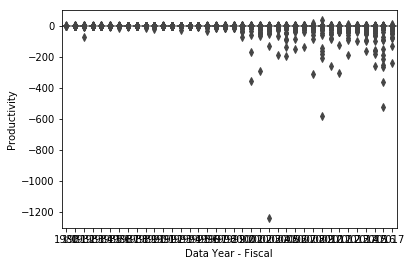

Leverage Ratio


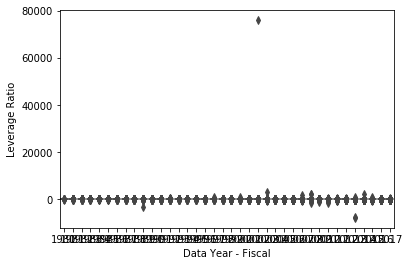

Asset Turnover


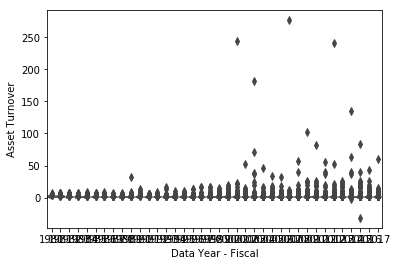

Operational Margin


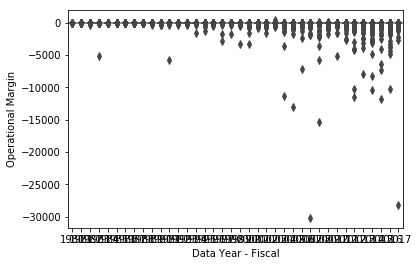

Return on Equity


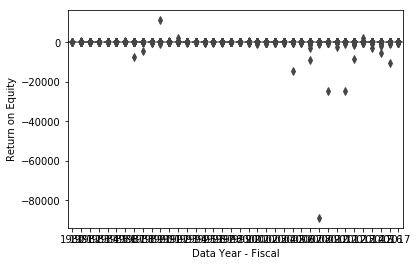

Market Book Ratio


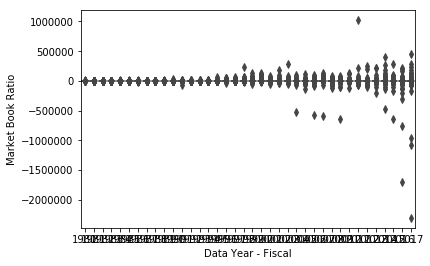

Assets Growth


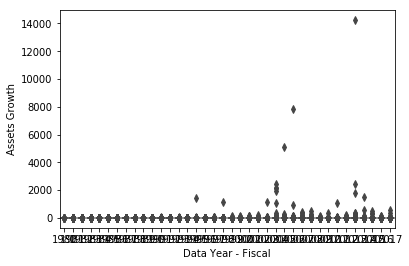

Sales Growth


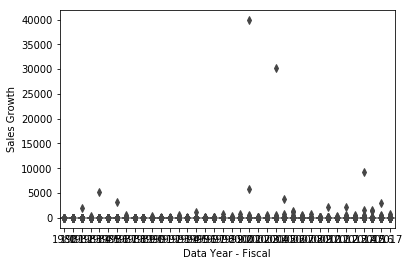

In [13]:
#Data Exploration - Outlier detection
import seaborn as sns
for i in range(1,13):
    print (df.columns[i])
    sns.boxplot(y = df.columns[i], x = 'Data Year - Fiscal', data = df)
    plt.show()


In [14]:
#Removing outliers
df = df.loc[df.iloc[:,1] < 1500 ,:]
df = df.loc[(df.iloc[:,2] > -250) & (df.iloc[:,2] < 250),:]
df = df.loc[df.iloc[:,3] > -200 ,:]
df = df.loc[df.iloc[:,4] > -2500,:]
df = df.loc[df.iloc[:,5] > -100 ,:]
df = df.loc[(df.iloc[:,6] < 2000) & (df.iloc[:,6] > -2000),:]
df = df.loc[(df.iloc[:,7] < 50) & (df.iloc[:,7] > -10),:]
df = df.loc[(df.iloc[:,8] > -7000)]
df = df.loc[(df.iloc[:,9] < 1000) & (df.iloc[:,9] > -1000),:]
df = df.loc[(df.iloc[:,10] < 500000) & (df.iloc[:,10] > -500000),:]
df = df.loc[df.iloc[:,11] < 600]
df = df.loc[df.iloc[:,12] < 2000]

Tobin's Q


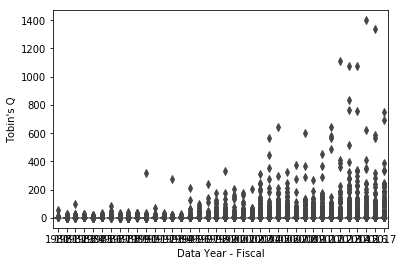

EPS


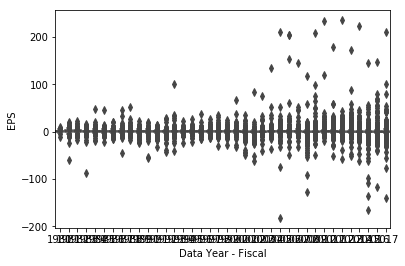

Liquidity


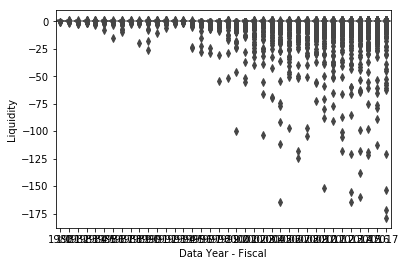

Profitability


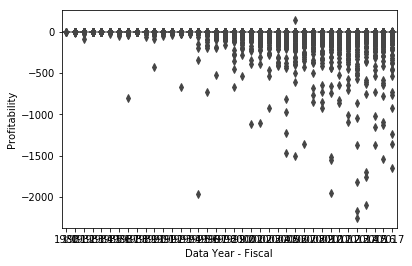

Productivity


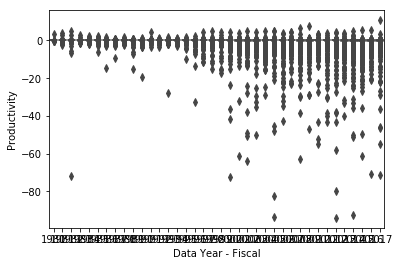

Leverage Ratio


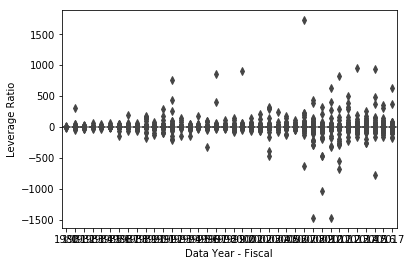

Asset Turnover


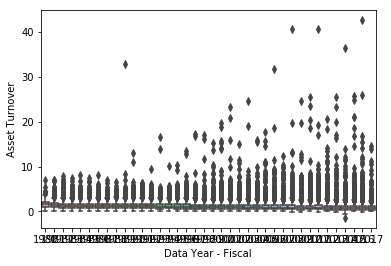

Operational Margin


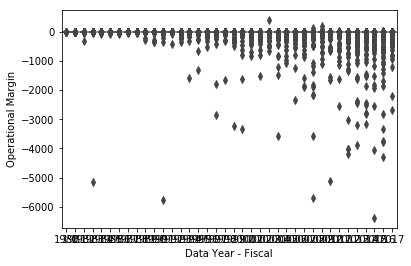

Return on Equity


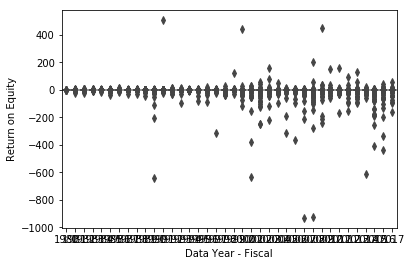

Market Book Ratio


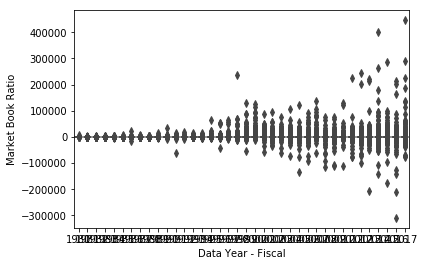

Assets Growth


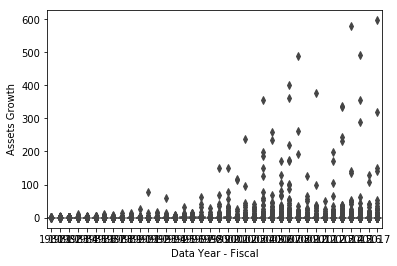

Sales Growth


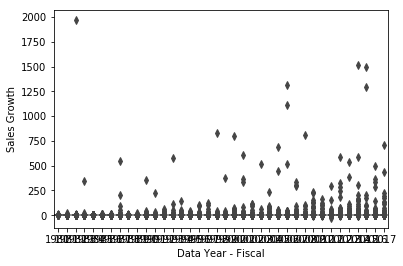

In [15]:
#Outlier removal verification
import seaborn as sns
for i in range(1,13):
    print (df.columns[i])
    sns.boxplot(y = df.columns[i], x = 'Data Year - Fiscal', data = df)
    plt.show()


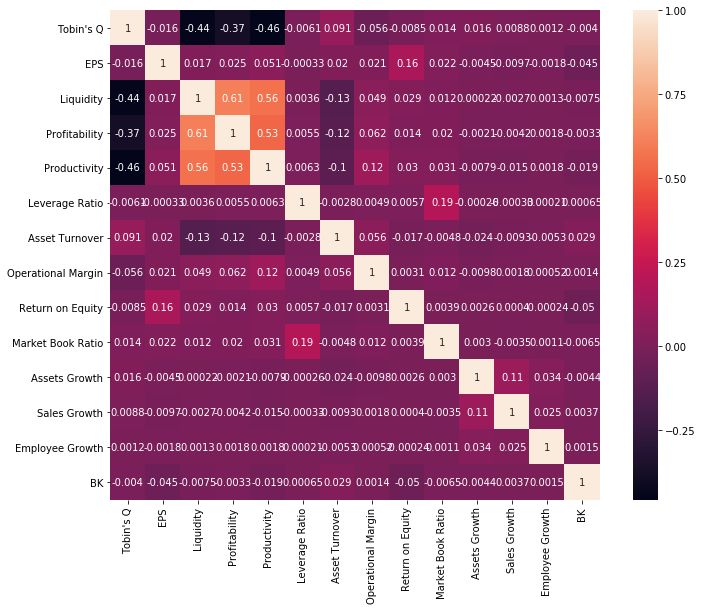

In [16]:
#Checking correlation of features with features and features with output variable - ** AFTER OUTLIER REMOVAL
# Heatmap analysis - Assume correlation threshold of 0.5
correlation_matrix = df.corr()
a, ab = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=1.0, square=True, annot = True)
plt.show()

In [17]:
#Removing Liquidity and 
# df.columns
df = df[['Data Year - Fiscal', 'Tobin\'s Q', 'EPS', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth', 'BK']]

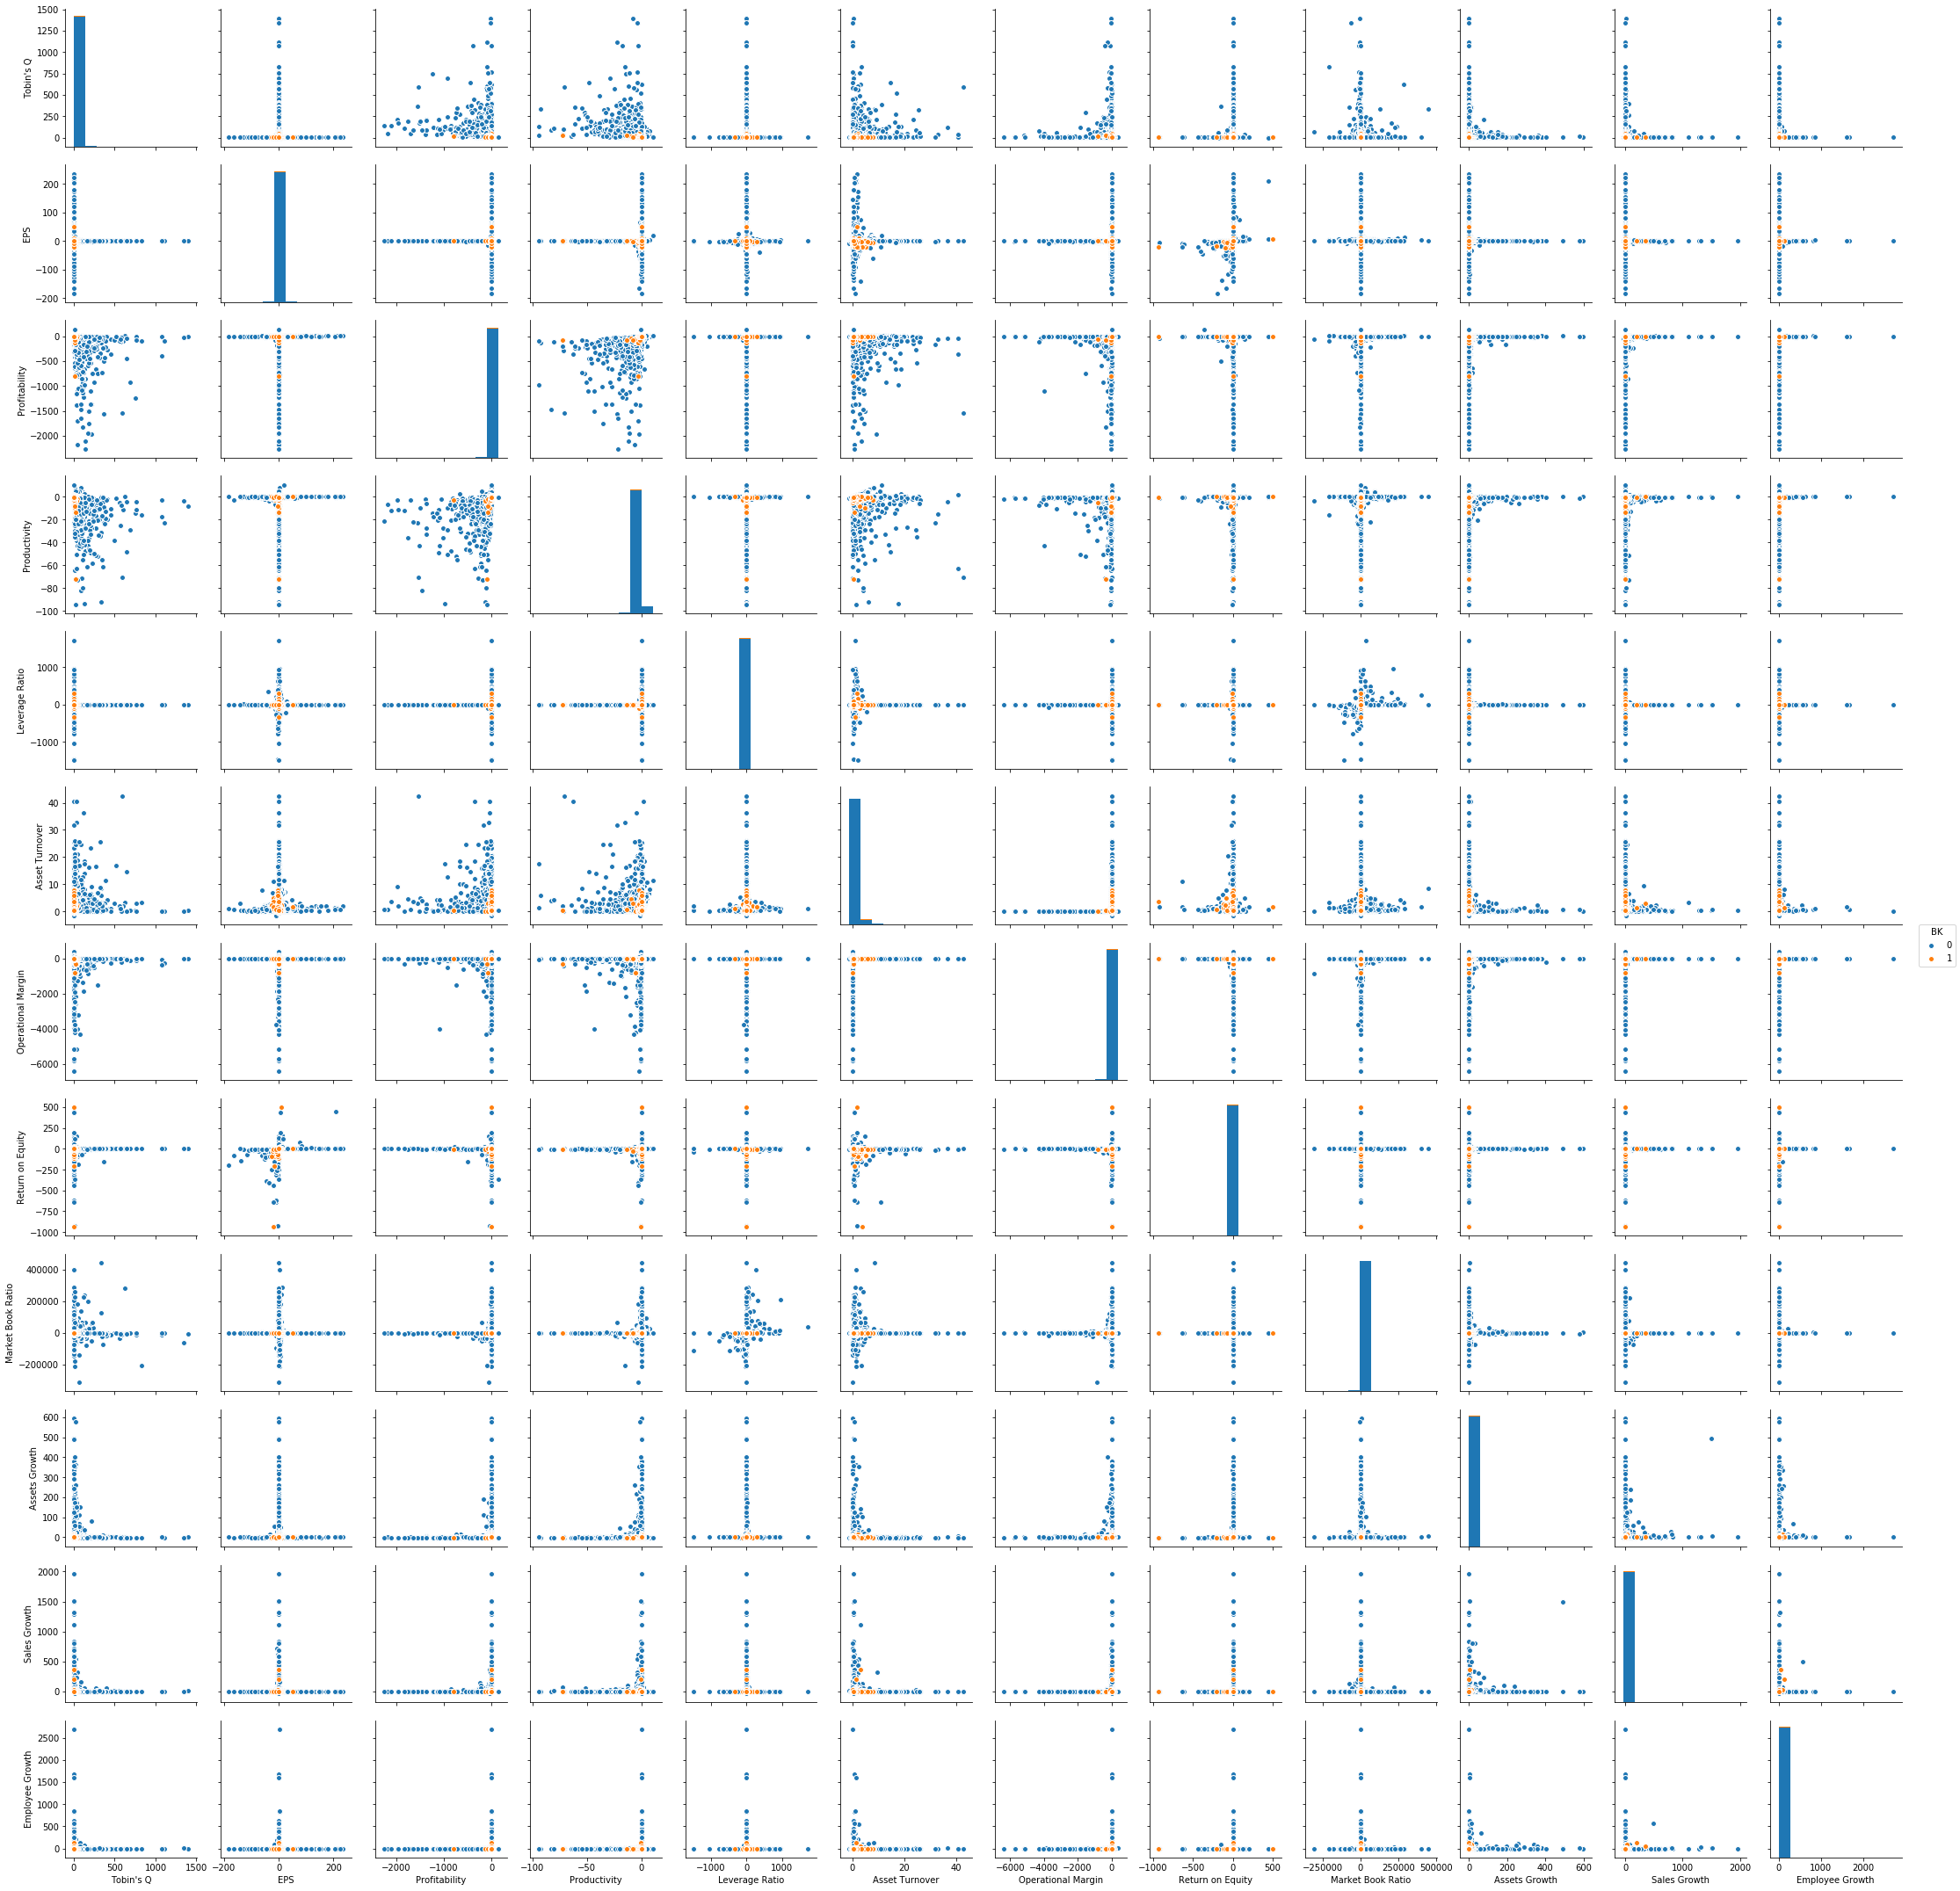

In [18]:
#Checking for Feature Interactions
sns.pairplot(data = df, vars = ['Tobin\'s Q', 'EPS', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth'], hue = 'BK')

In [19]:
#Feature Engineering on the basis of Interactions seen
#Interactions found in (Feature number in the df): 
# 2-3,8,6,9
# 3-10,11
# 4-10,11
# 5-10,11
# 6-10,11
# 7-10,11
# 8-10,11
# 9-10,11
# 10-11,12,13

list_i = [2,2,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,10]
list_j = [3,8,6,9,10,11,10,11,10,11,10,11,10,11,10,11,10,11,11,12,13]
for i,j in zip(list_i, list_j):
    df[str(df.columns[i-1] + ' MULT ' + df.columns[j-1])] = df[df.columns[i-1]] * df[df.columns[j-1]]

In [20]:
#Encoding Categorical Features
enc_col_list = ['Data Year - Fiscal']
df = pd.get_dummies(df, columns = enc_col_list)
# Total 72 columns now

In [21]:
# Need to fix dummy variable trap
df.drop(['Data Year - Fiscal_1980'],axis = 1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81010 entries, 1 to 92871
Data columns (total 71 columns):
Tobin's Q                                    81010 non-null float64
EPS                                          81010 non-null float64
Profitability                                81010 non-null float64
Productivity                                 81010 non-null float64
Leverage Ratio                               81010 non-null float64
Asset Turnover                               81010 non-null float64
Operational Margin                           81010 non-null float64
Return on Equity                             81010 non-null float64
Market Book Ratio                            81010 non-null float64
Assets Growth                                81010 non-null float64
Sales Growth                                 81010 non-null float64
Employee Growth                              81010 non-null float64
BK                                           81010 non-null int64
Tobin's Q

In [23]:
#Performing Scaling
X = pd.concat([ df.iloc[:,0:12] , df.iloc[:,13:] ], axis = 1) #Feature columns
y = pd.DataFrame(df.iloc[:,12])
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Checking class-imbalance

In [24]:
y.iloc[:,0].value_counts() 

0    80542
1      468
Name: BK, dtype: int64

> Class imbalance is EXTREME (0.5%). To proceed, create a balanced training set and an unbalanced, unseen test set

In [25]:
# Creating a hold out "imbalanced" sample of 20%
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y)

> Using this 80% sample for training

# Checking classifier performance WITHOUT correcting for class imbalance (just for learning)

In [31]:
#Model training Logistic Regssion
classifier_LR = LogisticRegression(random_state = 0)

#Model training K-NN
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', 
                                      p = 2)
#Model training SVM
classifier_SVM = SVC(C = 1.0, kernel = 'linear', random_state = 0)

#Model training Kernel SVM
classifier_K_SVM = SVC(C = 1.0, kernel = 'rbf', gamma = 'auto', random_state = 0)

#Model training Naive Bayes
classifier_NB = GaussianNB()

#Model training Decision Tree
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Model training Random Forest
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion='entropy',
                                       random_state = 0)

#Model training GBM (Gradient Boosting Machines)
classifier_GBM = GradientBoostingClassifier()

In [32]:
#Custom function to plot ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area ={0:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show();

#Custom function created by me for scoring - This is needed because GridSearchCV metrics were behaving erratically
#Assumption - the Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp
def custom_precision_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))
def custom_recall_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))
def custom_f1_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ( 2*(tp/(tp+fp))*(tp/(tp+fn))/((tp/(tp+fp))+(tp/(tp+fn))) )
def sklearn_auc_score(y_test, y_pred):
    return roc_auc_score(y_test, y_pred)

Note: In the classifier models below, LR, SVM and RF are running with class_weight = 'balanced', i.e. it assignms weight automatically according to the imbalance.

In Random Forest:
> class_weight='balanced': uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
> class_weight='balanced_subsample': is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

Showing performance of classifier_LR
Best parameters: {'C': 10, 'class_weight': 'balanced'}
Confusion Matrix: 
[[16101     7]
 [   94     0]]
*********AUC: 0.49978271666252794
****ACCURACY: 0.9937662017034934
***PRECISION: 0.0
******RECALL: 0.0
****F1 SCORE: 0.8127323418442449


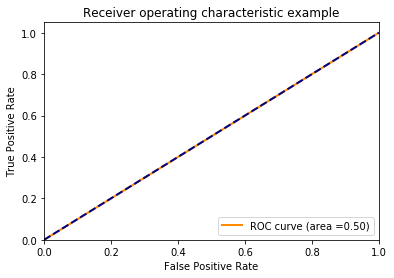

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     16108
         1.0       0.00      0.00      0.00        94

   micro avg       0.99      0.99      0.99     16202
   macro avg       0.50      0.50      0.50     16202
weighted avg       0.99      0.99      0.99     16202

---------------------------------------------------------------------
Showing performance of classifier_KNN
Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Confusion Matrix: 
[[16105     3]
 [   93     1]]
*********AUC: 0.5052260275058251
****ACCURACY: 0.9940748055795581
***PRECISION: 0.25
******RECALL: 0.010638297872340425
****F1 SCORE: 0.005404738153781482


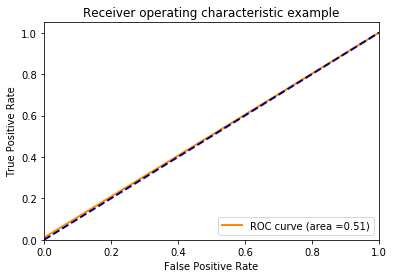

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     16108
         1.0       0.25      0.01      0.02        94

   micro avg       0.99      0.99      0.99     16202
   macro avg       0.62      0.51      0.51     16202
weighted avg       0.99      0.99      0.99     16202

---------------------------------------------------------------------


In [ ]:
#Training and comparing differnt classifiers with 10-fold Cross-Validation with Recall (TP/TP + FN)
# Sensitivity - When a company is actually bankrupt, how often does the classifier predict the outcome correctly?

#GridSearchCV custom scorer definition - Usingh the Recall score
score_func = make_scorer(custom_recall_score, greater_is_better=True)

y_train = np.asarray(y_train, dtype = float)
y_test = np.asarray(y_test, dtype = float)
classifiers_list = [(classifier_LR,'classifier_LR'),
                    (classifier_KNN,'classifier_KNN'),
                    (classifier_SVM,'classifier_SVM'),
                    (classifier_K_SVM,'classifier_K_SVM'),
                    (classifier_NB,'classifier_NB'),
#                     (classifier_DT,'classifier_DT'), 
                    (classifier_RF,'classifier_RF'),
                    (classifier_RF,'classifier_RF_2')]
Grid_srch_parameters_list = [[{'C': [10], 'class_weight': ['balanced']}],
                              [{'n_neighbors':[5,10],'weights':['uniform'],'p':[1]}],
                               [{'C':[1.0, 10],'kernel':['linear'],'class_weight': ['balanced']}],
                                [{'C':[1.0, 10],'kernel':['rbf'],'gamma':['auto']}],
                                [{}],
#                                 [{'criterion':['entropy','gini']}],
                                [{'n_estimators':[5,10],'criterion':['entropy','gini'], 'class_weight': ['balanced']}],
                                [{'n_estimators':[5,10],'criterion':['entropy','gini'], 'class_weight': ['balanced_subsample']}],
                            ]

warnings.filterwarnings("ignore")
i, length = 0, len(classifiers_list) + 1
for clf in classifiers_list:
    # Fitting classifier to training data
    clf[0].fit(X_train, y_train)
    # Predicting output
    y_pred = clf[0].predict(X_test)
    grid_search = GridSearchCV(estimator = clf[0], param_grid = Grid_srch_parameters_list[i], 
                               scoring = score_func,cv = 10)
    grid_search = grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print('Showing performance of ' + clf[1])
    print('Best parameters: ' + str(grid_search.best_params_))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n" + str(cm)) #Actual on the Left, Pred at the Top
    print("*********AUC: " + str(roc_auc_score(y_test, y_pred)))
    print("****ACCURACY: " + str(custom_accuracy_score(y_test, y_pred))) 
    print("***PRECISION: " + str(custom_precision_score(y_test, y_pred)))
    print("******RECALL: " + str(custom_recall_score(y_test, y_pred)))
    print("****F1 SCORE: " + str(grid_search.best_score_))
    plot_roc(y_test, y_pred)
    print("CLASSIFICATION REPORT: \n" + str(classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    i=i+1

> Stopped training due to compute constraints, but we can see that the Recall is too low.

# Imbalance correction attempt 1: SMOTE Oversampling - 1:1 ratio

In [ ]:
#Training and comparing differnt classifiers with 10-fold Cross-Validation with Recall (TP/TP + FN)
# Recall/Sensitivity - When a company is actually bankrupt, how often does the classifier predict the outcome correctly?

#GridSearchCV custom scorer definition - Usingh the Recall score
score_func = make_scorer(custom_recall_score, greater_is_better=True)

y_train = np.asarray(y_train, dtype = float)
y_test = np.asarray(y_test, dtype = float)

sm = SMOTE(sampling_strategy = 1.0, random_state=123) # 1.0 denotes equalnumber in minorty and majority
X_train, y_train = sm.fit_sample(X_train, y_train)
print(len(X_train))
print(len(y_train))
classifiers_list = [(classifier_LR,'classifier_LR'),
                    (classifier_KNN,'classifier_KNN'),
#                     (classifier_SVM,'classifier_SVM'),
#                     (classifier_K_SVM,'classifier_K_SVM'),
                    (classifier_NB,'classifier_NB'),
#                     (classifier_DT,'classifier_DT'), 
                    (classifier_RF,'classifier_RF'),
                    (classifier_GBM,'classifier_GBM')
                   ]
Grid_srch_parameters_list = [[{'C': [10], 'class_weight': ['balanced']}],
                              [{'n_neighbors':[5,10],'weights':['uniform'],'p':[1]}],
#                                [{'C':[1.0, 10],'kernel':['linear'],'class_weight': ['balanced']}],
#                                 [{'C':[1.0, 10],'kernel':['rbf'],'gamma':['auto']}],
                                [{}],
#                                 [{'criterion':['entropy','gini']}],
                                [{'n_estimators':[5,10],'criterion':['entropy','gini'], 'class_weight': ['balanced']}],
                             [{'loss':['deviance'],'learning_rate':[0.01, 0.1],
                               'min_samples_split': np.linspace(0.2, 20),'max_depth':[5,8],
                                'max_features':['sqrt'],'criterion': ['friedman_mse'],
                                'subsample':[0.5, 1.0],'n_estimators':[10]}]
                            ]

warnings.filterwarnings("ignore")
i, length = 0, len(classifiers_list) + 1
for clf in classifiers_list:
    # Fitting classifier to training data
    clf[0].fit(X_train, y_train)
    # Predicting output
    y_pred = clf[0].predict(X_test)
    grid_search = GridSearchCV(estimator = clf[0], param_grid = Grid_srch_parameters_list[i], 
                               scoring = score_func,cv = 10)
    grid_search = grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print('Showing performance of ' + clf[1])
    print('Best parameters: ' + str(grid_search.best_params_))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n" + str(cm)) #Actual on the Left, Pred at the Top
    print("*********AUC: " + str(roc_auc_score(y_test, y_pred)))
    print("****ACCURACY: " + str(custom_accuracy_score(y_test, y_pred))) 
    print("***PRECISION: " + str(custom_precision_score(y_test, y_pred)))
    print("******RECALL: " + str(custom_recall_score(y_test, y_pred)))
    print("****F1 SCORE: " + str(grid_search.best_score_))
    plot_roc(y_test, y_pred)
    print("CLASSIFICATION REPORT: \n" + str(classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    i=i+1

128868
128868


> An immediate observation is that Recall improved considerably, and model has better other performance measures.

# Imbalance correction 2: Oversample Minority class

In [ ]:
# Creating a hold out "imbalanced" sample of 20%
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y)
print(len(X_train))
print(len(y_train))

In [ ]:
#concat columns together
X_new = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_bkrpt = X_new[X_new.Class==0]
bkrpt = X_new[X_new.Class==1]

# upsample the minority class
bkrpt_upsampled = resample(bkrpt, replace=True, # with replacement
                          n_samples=len(not_bkrpt), # equal to number of majority class data points
                          random_state=123)

# combine majority and upsampled minority
upsampled_total = pd.concat([not_bkrpt, bkrpt_upsampled])

# check new class counts
upsampled.BK.value_counts()

y_train = upsampled.BK
X_train = upsampled.drop('BK', axis=1)

print(len(X_train))
print(len(y_train))

In [ ]:
#Training and comparing differnt classifiers with 10-fold Cross-Validation with Recall (TP/TP + FN)
# Recall/Sensitivity - When a company is actually bankrupt, how often does the classifier predict the outcome correctly?

#GridSearchCV custom scorer definition - Usingh the Recall score
score_func = make_scorer(custom_recall_score, greater_is_better=True)

y_train = np.asarray(y_train, dtype = float)
y_test = np.asarray(y_test, dtype = float)

print(len(X_train))
print(len(y_train))
classifiers_list = [(classifier_LR,'classifier_LR'),
                    (classifier_KNN,'classifier_KNN'),
#                     (classifier_SVM,'classifier_SVM'),
#                     (classifier_K_SVM,'classifier_K_SVM'),
                    (classifier_NB,'classifier_NB'),
#                     (classifier_DT,'classifier_DT'), 
                    (classifier_RF,'classifier_RF'),
                    (classifier_RF,'classifier_RF_2')]
Grid_srch_parameters_list = [[{'C': [10], 'class_weight': ['balanced']}],
                              [{'n_neighbors':[5,10],'weights':['uniform'],'p':[1]}],
#                                [{'C':[1.0, 10],'kernel':['linear'],'class_weight': ['balanced']}],
#                                 [{'C':[1.0, 10],'kernel':['rbf'],'gamma':['auto']}],
                                [{}],
#                                 [{'criterion':['entropy','gini']}],
                                [{'n_estimators':[5,10],'criterion':['entropy','gini'], 'class_weight': ['balanced']}],
                                [{'n_estimators':[5,10],'criterion':['entropy','gini'], 'class_weight': ['balanced_subsample']}],
                            ]

warnings.filterwarnings("ignore")
i, length = 0, len(classifiers_list) + 1
for clf in classifiers_list:
    # Fitting classifier to training data
    clf[0].fit(X_train, y_train)
    # Predicting output
    y_pred = clf[0].predict(X_test)
    grid_search = GridSearchCV(estimator = clf[0], param_grid = Grid_srch_parameters_list[i], 
                               scoring = score_func,cv = 10)
    grid_search = grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print('Showing performance of ' + clf[1])
    print('Best parameters: ' + str(grid_search.best_params_))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n" + str(cm)) #Actual on the Left, Pred at the Top
    print("*********AUC: " + str(roc_auc_score(y_test, y_pred)))
    print("****ACCURACY: " + str(custom_accuracy_score(y_test, y_pred))) 
    print("***PRECISION: " + str(custom_precision_score(y_test, y_pred)))
    print("******RECALL: " + str(custom_recall_score(y_test, y_pred)))
    print("****F1 SCORE: " + str(grid_search.best_score_))
    plot_roc(y_test, y_pred)
    print("CLASSIFICATION REPORT: \n" + str(classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    i=i+1

# Checking classifier performance BY correcting for class imbalance

1. Undersampling (balanced): all the observations from the minority class are kept and sampling without replacement is performed in the majority class where the number of observations sampled is equal to the sample size of the minority class.

2. Upsampling (balanced): decide how many times the sample size of the minority class wants to be used and perform sampling with replacement in the minority class and sampling without replacement in the majority class. Be careful with this strategy because it has the risk to trigger overfitting due to the repetition of the same observations in the minority class.

3. Negative downsampling (imbalanced): different samples sizes are used in this procedure. In all these samples all the observations from the minority class are kept and we take different number of observations from the majority class by performing sampling without replacement.

4. Synthetic Minority Over-sampling Technique (SMOTE)

In [ ]:
feature importance code?

References:
https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7
https://medium.com/bluekiri/dealing-with-highly-imbalanced-classes-7e36330250bc
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18